## Daniel Burke 12067717

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#from datetime import datetime
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler

df = pd.read_csv('./bank_test.csv')

df_original = df # make a copy

print("Instances, Features: ", df.shape)

Instances, Features:  (1000, 7)


In [4]:
df.isnull().sum()
df.isna().sum() # 4 values from Job missing. Q1

age            5
job            4
education     50
balance        0
loan           0
contact       14
subscribed     0
dtype: int64

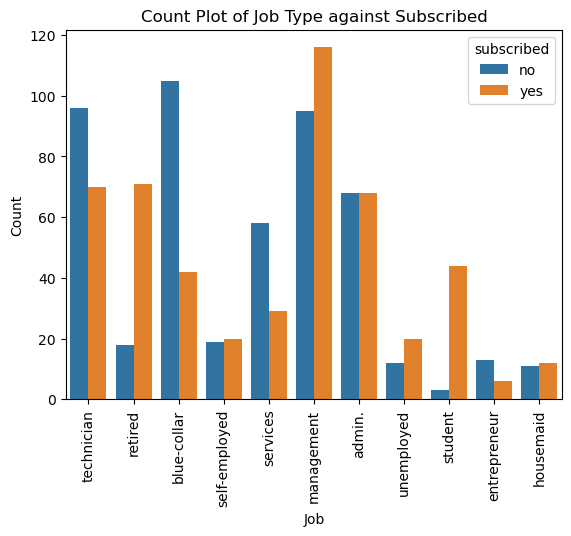

In [12]:
sns.countplot(data=df, x='job', hue='subscribed') #Q3

plt.title('Count Plot of Job Type against Subscribed')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

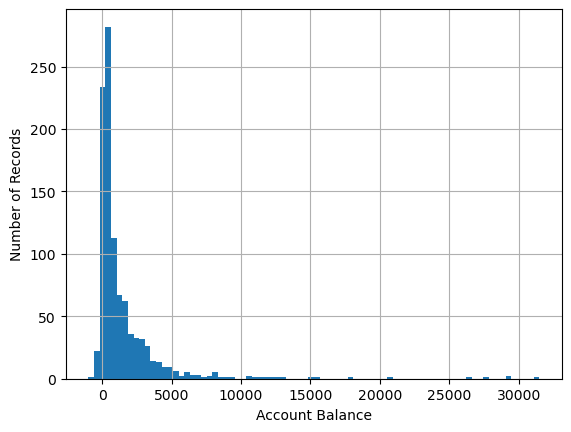

In [26]:
# Histogram Distribution
df['balance'].hist(bins=80) # Should I vary this?
#df['balance'].hist(bins=[i for i in range(0, 2000, 2000)])
plt.xlabel('Account Balance')
plt.ylabel('Number of Records') # of course some clients here are entered multiple times.
plt.show()

# not exact but shows enough for the first bin. #Q6

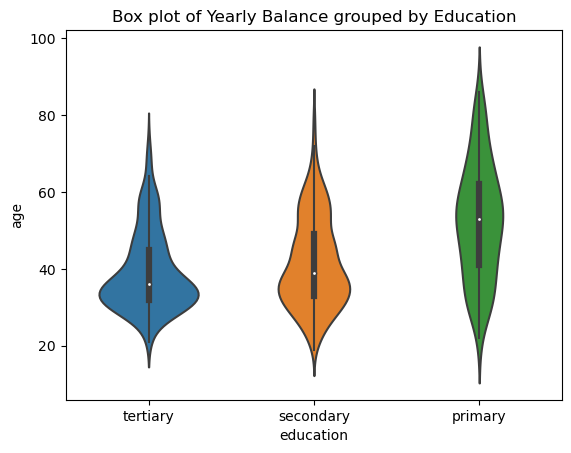

In [29]:
# group by education should show more   #Q7
sns.violinplot(data=df, x='education', y='age', width=0.6)
plt.title('Box plot of Yearly Balance grouped by Education')
plt.show()

In [31]:
CATEGORICAL_FEATURES = ['job', 'education', 'subscribed'] # Q8

# Create an empty DataFrame to store the value counts
value_counts_df = pd.DataFrame(columns=['Feature', 'Value', 'Count', 'Percentage'])

# Create an empty list
data = []

# Loop through each categorical feature
for feature in CATEGORICAL_FEATURES:
    # Calculate value counts for the current feature
    counts = df[feature].value_counts()/1000 # do it straight here instead of below
    
    # Loop through each value count
    for value, count in counts.items():
        # Append the feature, value, and count to the list as a dictionary
        data.append({'Feature': feature, 'Value': value, 'Count': count})

    # Divide by 1000 to get %
    #for count in counts.items():
        # divide by 1000
     #   data.append({', 'Value': value, 'Count': count})


# Create a DataFrame from the list of dictionaries
value_counts_df = pd.DataFrame(data)

print(value_counts_df.to_string(index=False))

   Feature         Value  Count
       job    management  0.211
       job    technician  0.166
       job   blue-collar  0.147
       job        admin.  0.136
       job       retired  0.089
       job      services  0.087
       job       student  0.047
       job self-employed  0.039
       job    unemployed  0.032
       job     housemaid  0.023
       job  entrepreneur  0.019
 education     secondary  0.517
 education      tertiary  0.323
 education       primary  0.110
subscribed            no  0.500
subscribed           yes  0.500


In [33]:
df['balance'].max() # max for all customers

31472

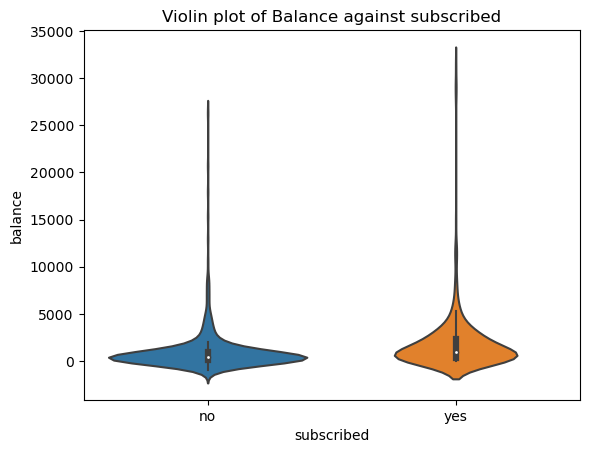

In [35]:
sns.violinplot(data=df, x='subscribed', y='balance')
plt.title('Violin plot of Balance against subscribed')
plt.show() # Q10 I can see subscribed customer or customers above 20k.

In [38]:
max_balance_subscribed_yes = df.loc[df['subscribed'] == 'yes', 'balance'].max()
print(max_balance_subscribed_yes)


31472


In [36]:
df['balance'].mean() # Q11

1437.513

In [37]:
# Create an empty DataFrame to store the value counts Q13
value_counts_df = pd.DataFrame(columns=['Feature', 'Value', 'Count'])

# Create an empty list
data = []

# Loop through each categorical feature
for feature in CATEGORICAL_FEATURES:
    # Calculate value counts for the current feature
    counts = df[feature].value_counts()
    
    # Loop through each value count
    for value, count in counts.items():
        # Append the feature, value, and count to the list as a dictionary
        data.append({'Feature': feature, 'Value': value, 'Count': count})


# Create a DataFrame from the list of dictionaries
value_counts_df = pd.DataFrame(data)

print(value_counts_df.to_string(index=False))

   Feature         Value  Count
       job    management    211
       job    technician    166
       job   blue-collar    147
       job        admin.    136
       job       retired     89
       job      services     87
       job       student     47
       job self-employed     39
       job    unemployed     32
       job     housemaid     23
       job  entrepreneur     19
 education     secondary    517
 education      tertiary    323
 education       primary    110
subscribed            no    500
subscribed           yes    500


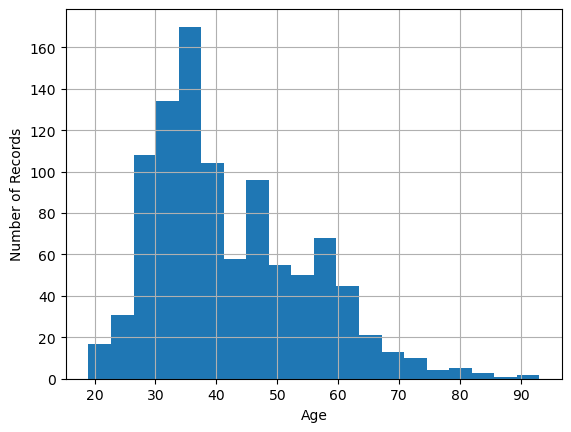

In [40]:
# Histogram Distribution Q 14
df['age'].hist(bins=20) # Should I vary this?
plt.xlabel('Age')
plt.ylabel('Number of Records')
plt.show()
# no transformations

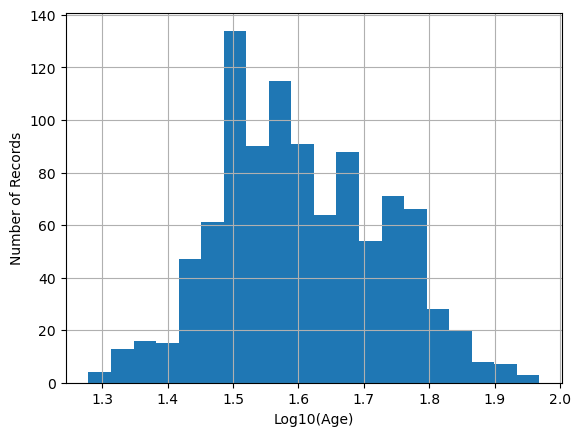

In [41]:
log_age = np.log10(df['age'])

# Plot
log_age.hist(bins=20)
plt.xlabel('Log10(Age)')
plt.ylabel('Number of Records')
plt.show()

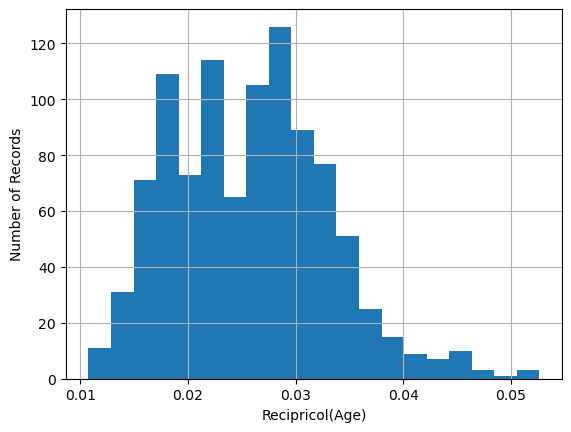

In [47]:
reciprocal_age = np.reciprocal(df['age'])

# Plot
reciprocal_age.hist(bins=20)
plt.xlabel('Recipricol(Age)')
plt.ylabel('Number of Records')
plt.show()

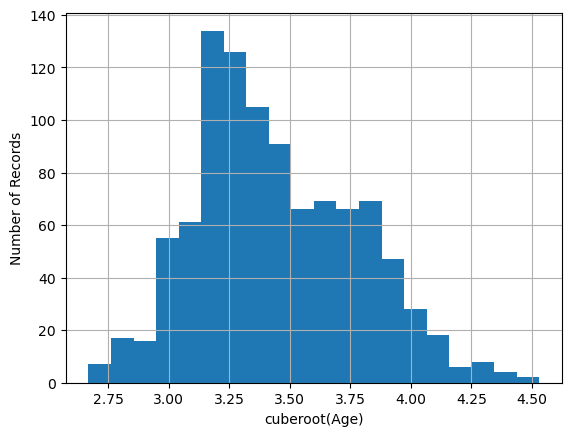

In [48]:
cube_root_age = np.cbrt(df['age'])

# Plot
cube_root_age.hist(bins=20)
plt.xlabel('cuberoot(Age)')
plt.ylabel('Number of Records')
plt.show()

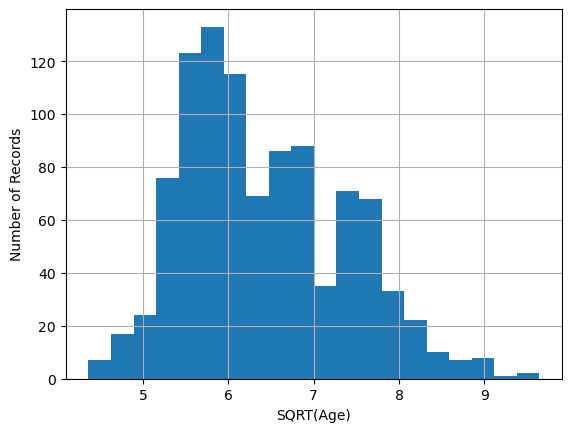

In [50]:
sqrtage = np.sqrt(df['age'])

# Plot
sqrtage.hist(bins=20)
plt.xlabel('SQRT(Age)')
plt.ylabel('Number of Records')
plt.show()